# PCA Warmup

You are going to perform principal component analysis (PCA) on the auto dataset (from the last couple weeks of warmups). Make a vanilla instance of PCA and fit the features. Now, use the method explained_variance_ratio_ in conjunction with numpy’s cumulative sum function and plot the outcome.
(If you are unsure how to do this, practice your Googling skills. You have enough keywords to get you there.)
Once you have the plot, how many principal components could we use to safely approximate our data? Discuss with a small group as to why that is the case? Were all the assumptions of PCA met?

In [75]:
#import libraries:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [76]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [77]:
#load df:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', sep = '\s+',
                 names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 
                     'model_year', 'origin', 'car_name'])

In [78]:
X = df.drop('car_name', axis=1)
X.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [79]:
#there are ? marks in the data
X['horsepower'].value_counts()

150.0    22
90.00    20
88.00    19
110.0    18
100.0    17
75.00    14
95.00    14
105.0    12
67.00    12
70.00    12
65.00    10
97.00     9
85.00     9
145.0     7
80.00     7
140.0     7
?         6
78.00     6
72.00     6
68.00     6
84.00     6
92.00     6
175.0     5
115.0     5
60.00     5
86.00     5
180.0     5
170.0     5
71.00     5
130.0     5
165.0     4
83.00     4
52.00     4
120.0     4
76.00     4
96.00     3
48.00     3
112.0     3
225.0     3
74.00     3
69.00     3
190.0     3
125.0     3
215.0     3
63.00     3
53.00     2
58.00     2
129.0     2
46.00     2
155.0     2
62.00     2
160.0     2
98.00     2
79.00     2
153.0     2
198.0     2
139.0     2
81.00     2
87.00     2
61.00     1
208.0     1
133.0     1
89.00     1
135.0     1
108.0     1
77.00     1
49.00     1
93.00     1
220.0     1
116.0     1
103.0     1
149.0     1
210.0     1
193.0     1
158.0     1
91.00     1
82.00     1
94.00     1
230.0     1
138.0     1
64.00     1
54.00     1
200.0     1
142.

In [80]:
X.loc[X.horsepower == '?', 'horsepower'] = "0"

In [81]:
#there are ? marks in the data
X['horsepower'].value_counts()

150.0    22
90.00    20
88.00    19
110.0    18
100.0    17
75.00    14
95.00    14
105.0    12
67.00    12
70.00    12
65.00    10
97.00     9
85.00     9
145.0     7
80.00     7
140.0     7
0         6
78.00     6
72.00     6
68.00     6
84.00     6
92.00     6
175.0     5
115.0     5
60.00     5
86.00     5
180.0     5
170.0     5
71.00     5
130.0     5
165.0     4
83.00     4
52.00     4
120.0     4
76.00     4
96.00     3
48.00     3
112.0     3
225.0     3
74.00     3
69.00     3
190.0     3
125.0     3
63.00     3
215.0     3
53.00     2
58.00     2
87.00     2
79.00     2
129.0     2
46.00     2
155.0     2
62.00     2
160.0     2
153.0     2
98.00     2
198.0     2
139.0     2
81.00     2
135.0     1
133.0     1
108.0     1
89.00     1
208.0     1
49.00     1
220.0     1
193.0     1
77.00     1
103.0     1
93.00     1
61.00     1
116.0     1
149.0     1
210.0     1
122.0     1
148.0     1
91.00     1
94.00     1
230.0     1
82.00     1
138.0     1
64.00     1
54.00     1
200.

In [82]:
X['horsepower'] = X['horsepower'].astype('float64')

In [83]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [84]:
X.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,102.894472,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,40.269544,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [85]:
#impute median value of horsepower - it's 92
X.loc[X.horsepower == 0, 'horsepower'] = 92

In [86]:
#scale data

ss = StandardScaler()
X = ss.fit_transform(X)

In [87]:
#make a vanilla instance of PCA
#fit features to PCA
pca = PCA()
results = pca.fit(X)

In [91]:
print(results.components_)
print(results.explained_variance_)
print(results.explained_variance_ratio_)

[[-0.38580162  0.40275434  0.41695023  0.40168736  0.40190901 -0.2645932
  -0.2140213  -0.27640604]
 [-0.06849535 -0.13118976 -0.12301866  0.11370877 -0.21131327 -0.42758589
  -0.67874104  0.5117245 ]
 [-0.29490097 -0.07641382 -0.07822995 -0.23415885 -0.00858471  0.62604388
  -0.60148279 -0.30406884]
 [-0.10120155  0.21724278  0.13702467  0.1127418   0.32286595  0.50056965
   0.10330072  0.73864329]
 [-0.73848495 -0.48794163 -0.29915428  0.07906663  0.13873246 -0.10213423
   0.29723083  0.0527623 ]
 [ 0.38001831 -0.51789304 -0.01482805  0.68660595  0.21245796  0.21129987
  -0.10910887 -0.11846737]
 [-0.21602731  0.29905531 -0.10057689  0.51522204 -0.72225281  0.21913538
   0.13348335 -0.0290073 ]
 [-0.11320522 -0.41450015  0.82842885 -0.12265193 -0.32166058  0.03950294
   0.05462756  0.07762833]]
[5.3773614  0.9455558  0.81950778 0.48737413 0.1861679  0.11729598
 0.05488951 0.03199864]
[0.67048131 0.1178975  0.10218109 0.0607687  0.02321252 0.01462516
 0.00684395 0.00398978]


In [89]:
results.explained_variance_ratio_.cumsum()

array([0.67048131, 0.78837881, 0.8905599 , 0.9513286 , 0.97454111,
       0.98916627, 0.99601022, 1.        ])

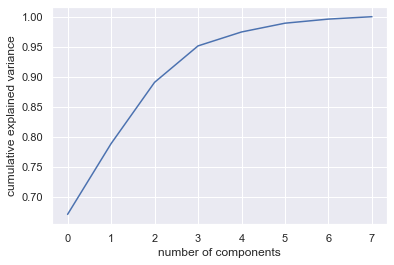

In [90]:
#plot explained variance ratio
plt.plot(np.cumsum(results.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
#how many principle components could we use to approximate our data?
#why?
#were all assumptions of PCA met?

I would say that we could use 3 or 4 principle components to approximate our data. The cumulative sum of all of the variance explained by our best 3 components is 89%, and for 4 components is 95%. After 4 components, we are only gaining 2% or less of variance explained...and isn't worth using to understand the data. Total variance is equal to 1...so I think all assumptions are met...not sure.